# Advanced Exercise 4

<ul>
<li><b>4. Try out any of the previous examples and exercises by using any or many
of the following additional plotting libraries:<br /><br />
</li>
<ul>
<li><b>Matplotlib (this is the most common in addition to seaborn,
especially regarding machine learning, recommended to learn)</b><br />
<a href="https://matplotlib.org/stable/tutorials/index.html#introductory">https://matplotlib.org/stable/tutorials/index.html#introductory</a><br /><br /></li>
<li><b>Plotly</b><br />
<a href="https://plotly.com/python/getting-started/">https://plotly.com/python/getting-started/</a><br /><br /></li>
<li><b>Bokeh</b><br /><a href="https://docs.bokeh.org/en/latest/docs/user_guide.html">https://docs.bokeh.org/en/latest/docs/user_guide.html</a>
<br /><br /></li>
</ul>
</ul>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/charts.png" />

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category10

# These two are required in order to make bokeh run
# inside of the notebook:
from bokeh.io import output_notebook
output_notebook()

df = sns.load_dataset('penguins')

Loading BokehJS ...

# Recreating Seaborn Exercises with Matplotlib 

---

### Seaborn
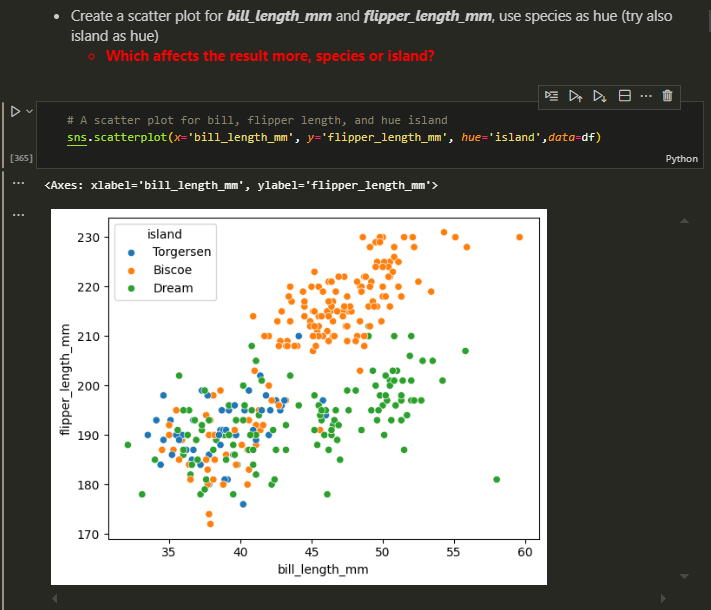

### Matplotlib

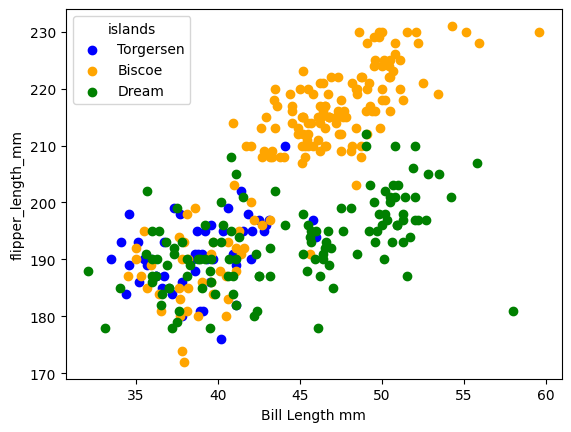

In [69]:
# Creating a portion of the penguins exercise, using hue.
# Filtered dataframes 
island_torgersen = df[df['island'] == 'Torgersen']
island_biscoe = df[df['island'] == 'Biscoe']
island_dream = df[df['island'] == 'Dream']

# Setting variables
x1, y1 = island_torgersen['bill_length_mm'], island_torgersen['flipper_length_mm']
x2, y2 = island_biscoe['bill_length_mm'], island_biscoe['flipper_length_mm']
x3, y3 = island_dream['bill_length_mm'], island_dream['flipper_length_mm']

# Making the plots
plt.scatter(x1,y1, color = 'blue', label = "Torgersen")
plt.scatter(x2,y2, color = 'orange', label = 'Biscoe' )
plt.scatter(x3,y3, color = 'green', label = 'Dream')

# Setting labels, legends and show
plt.xlabel('Bill Length mm')
plt.ylabel('flipper_length_mm')
plt.legend(title='islands')
plt.show()




---

### Seaborn
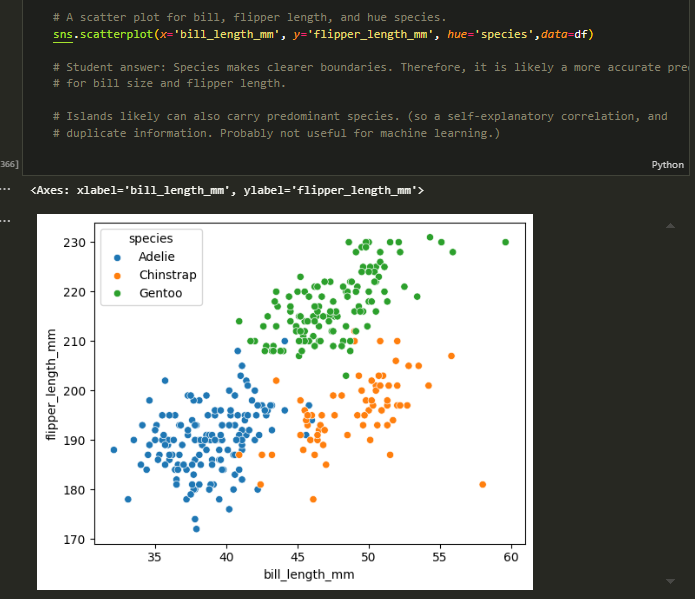

### Matplotlib

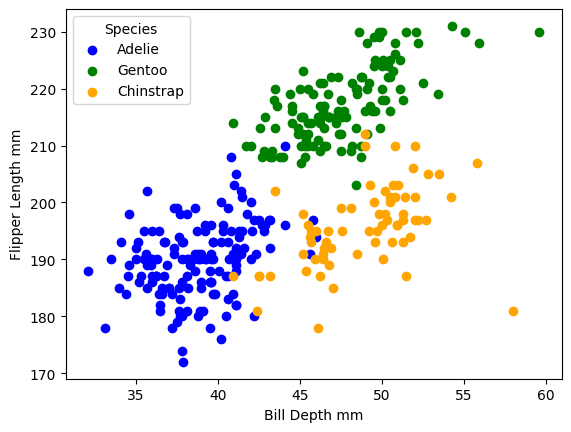

In [70]:
# Recreating another portion of the penguins exercise, using hue.
# Filtered dataframes 
species_adelie = df[df['species'] == 'Adelie']
species_gentoo = df[df['species'] == 'Gentoo']
species_chinstrap = df[df['species'] == 'Chinstrap']

# Setting variables
# It makes more sense to declare the variables in pairs since they are coordsinates.
x1, y1 = species_adelie['bill_length_mm'], species_adelie['flipper_length_mm']
x2, y2 = species_gentoo['bill_length_mm'], species_gentoo['flipper_length_mm']
x3, y3 = species_chinstrap['bill_length_mm'], species_chinstrap['flipper_length_mm']

# Making the plots
# The label attribute adds whatever string you give it to the legend table with the 
# Appropriate color.
plt.scatter(x1, y1, color='blue', label='Adelie')
plt.scatter(x2, y2, color='green', label='Gentoo')
plt.scatter(x3, y3, color='orange', label='Chinstrap')

# Setting labels, legends and show
plt.xlabel('Bill Depth mm')
plt.ylabel('Flipper Length mm')
plt.legend(title='Species')
plt.show()



---

### Seaborn
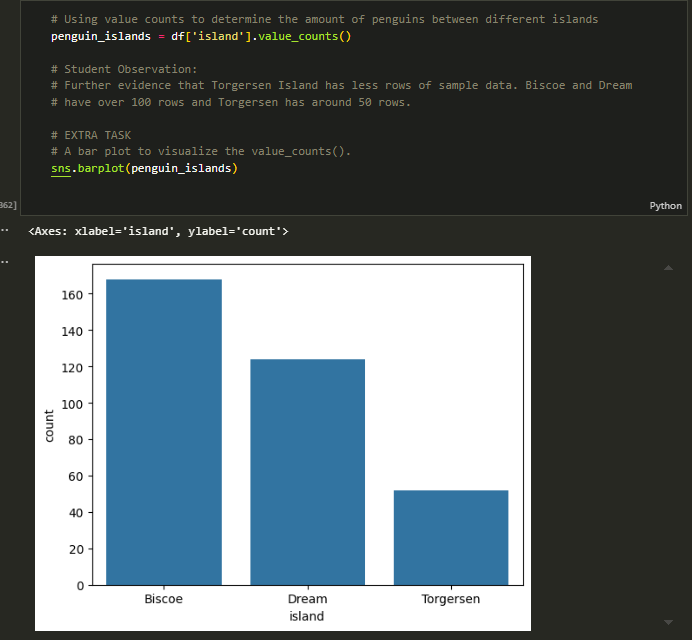

### Matplotlib

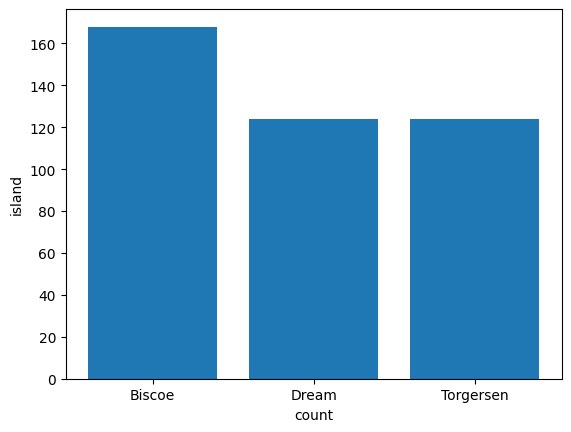

In [71]:

# Column variable
island_column = df['island']

# Making count values
count_biscoe = island_column[df['island'] == 'Biscoe'].count()
count_dream = island_column[df['island'] == 'Dream'].count()
count_torgersen = island_column[df['island'] == 'Dream'].count()

# Setting X and Y values 
values = [count_biscoe, count_dream, count_torgersen]
names =  ['Biscoe', 'Dream', 'Torgersen']

# Creating the bar plot


plt.bar(names, values)
plt.xlabel('count')
plt.ylabel('island')
plt.show()

---

# Recreating exercises with Bokeh

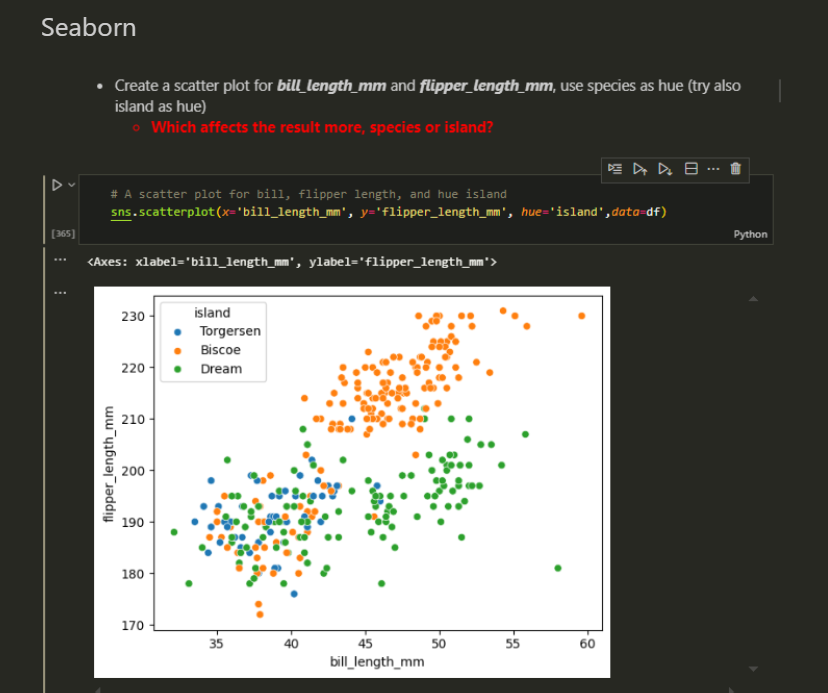

## Bokeh

In [72]:
# I'm going to comment this quite a bit to I can recall how I did this for later

# This is the canvas. It includes the height, width, and x/y axis labels.
p = figure(width=400, height=400, x_axis_label="bill_length_mm", y_axis_label='flipper_length_mm')

# ColumnDataSource() is used so you can refer directly to pandas df columns
# without having to call it from the dataframe ex: df['column'] is instead 'column'
source = ColumnDataSource(df)

# This variable is used in order to make the 'hue' from sns into Bokeh. It uses this
# list as a factor to identify the species for the plot and refers them to colors.
# Which colors? Category10 (apparently there are a number of choices.)
species_list = df['species'].unique().tolist()


# This part plots the actual graph, the first two attributes are the columns 
# source lets us call the columns easier, size controls the dot size, factor_cmap
# maps categorical variables for us, legend field allows us to see what color each
# categorical variable means.
p.circle('bill_length_mm', 'flipper_length_mm', source=source, size=6,
        color=factor_cmap('species',
        palette=Category10[len(species_list)], factors=species_list), legend_field='species')

show(p)

---

## Seaborn
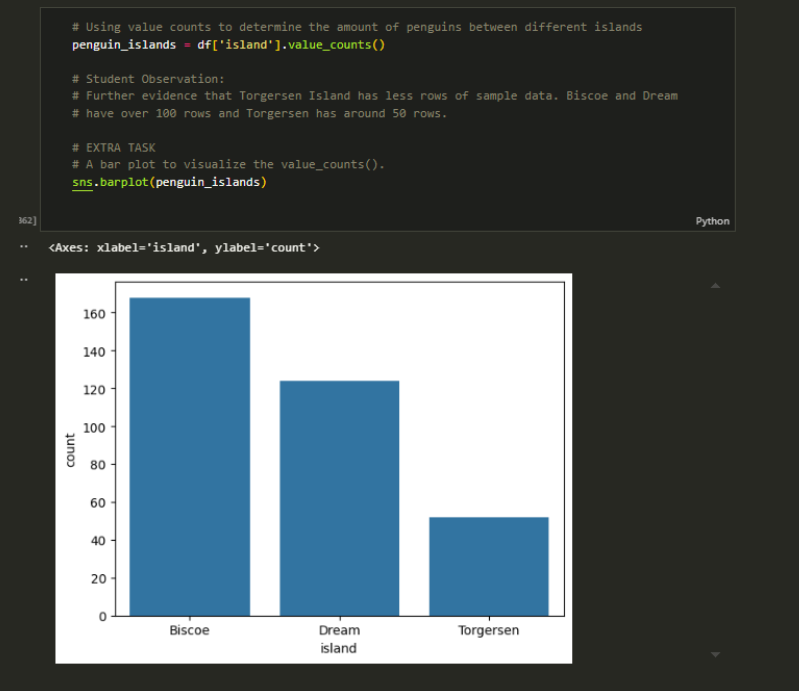

## Bokeh

In [84]:
counts = df['island'].value_counts().tolist()
counts

[168, 124, 52]

In [86]:
# All three islands in a list
islands = df['island'].unique().tolist()

# The count values of each respective island in a list.
counts = df['island'].value_counts().tolist()

# x_range passes the categories along the x-axis, toolbar_location=None hides the toolbar,
# and tool="" removes all of the interactive tools in Bokeh.
p = figure(x_range=islands, height=350, x_axis_label='counts', y_axis_label='Island',
toolbar_location=None, tools="")

# Sets the bar chart, with top as the Y value. Width sets how narrow the bars
# Are, allowing me to make it quite similar to the seaborn version.
p.vbar(x=islands,top=counts, width=0.7)
show(p)